In [10]:
import numpy as np
import scipy.constants as ct
import random
import scipy as sc
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sympy as sp

import json

In [11]:
#k = np.linspace(-5,5,500)
#k[244:249] = -1
#k[250:255] = 1
k = np.linspace(1,10,500)
tau = np.linspace(0,1,500)
ltau = np.log(tau)

#unit = 1e-21 


/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_58486/2786030592.py:6: RuntimeWarning: divide by zero encountered in log
  ltau = np.log(tau)


In [12]:

def bose_dist(x):

    T = 273
    #boltz = ct.k*T

    return 1/(np.exp(x)-1)


In [13]:
def green(tau,k):

    #for i in range(len(tau)):
        #if tau[i] > 0:
    return (((bose_dist(k)+1)*np.exp(-k*tau)) + (bose_dist(k))*np.exp(-k*tau))
        #if tau[i] < 0:
           # return (bose_dist(k))*np.exp(-k*tau)

def approx(tau,k):
    return (-k*tau + (np.exp(k)+1)/(np.exp(k)-1))*coupling(2,0.2,10)**2
        

In [14]:
arr=np.zeros(len(k))
arr2=np.zeros(len(k))

for j in range(len(k)):
    t=tau[j]
    for i in range(len(tau)):
        arr[i]=approx(t,k)[i]
    arr2[j]=np.sum(arr)
    arr=np.zeros(len(k))

In [15]:
    def func(x):
        return 1/(x**2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


684.0520832744678


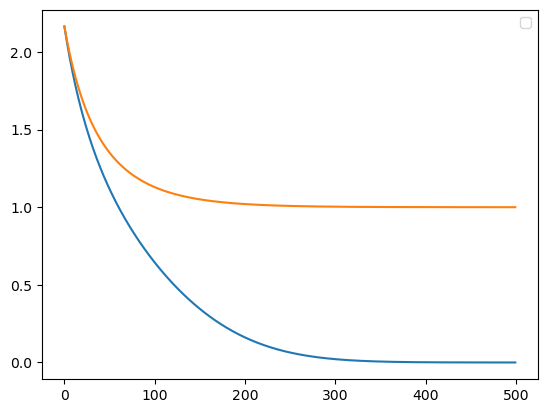

In [16]:
s=np.sum(green(tau,1))
print(s)

plt.plot(green(tau,k))
plt.plot(1+2*bose_dist(k))
#plt.plot(tau,green(tau,0.01),label = "0.01")
#plt.plot(tau,green(tau,0.1),label = "0.1",color='orange')
#plt.plot(tau,green(tau,1),label = "1",color='g')


plt.legend()
plt.show()

In [17]:
def omega(v):
    return v*np.abs(k)

def coupling(v,g,W):
    w = omega(v)
    cut_off = W
    return g*np.sqrt(w/(1+(w/cut_off)**2))

def interact(tau):

    file_path = "./data.json"

    with open(file_path, 'r') as file:
        data = json.load(file)
    
    v = data['v']
    g = data['g']
    W = data['W']

    g_k = coupling(v,g,W)**2

    n = len(k)

    k_sum = np.zeros(n)
    t_array = np.zeros(n)

    for j in range(n):
        t = tau[j]
        for i in range(n):
            k_sum[i] = g_k[i] * green(t,k)[i]
        t_array[j] = np.sum(k_sum)
        k_sum = np.zeros(len(k))
    
    #print(t_array)
    return t_array


92.47749423425631


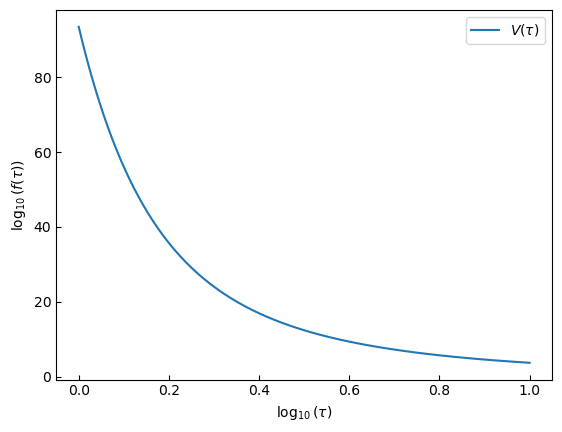

In [26]:
#interact(tau)
print(interact(tau)[1])

plt.plot(tau,interact(tau),label=r'$V(\tau)$')
#plt.plot(tau,func(tau),label=r'$\frac{1}{\tau^2}$')
#plt.plot(tau,arr2)
#plt.ylim(70,100)
#plt.plot(tau,(coupling(2,0.2,10)**2)*(1+2*bose_dist(k)))
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log_{10}(\tau)$')
plt.ylabel(r'$\log_{10}(f(\tau))$')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')

plt.legend()
plt.show()


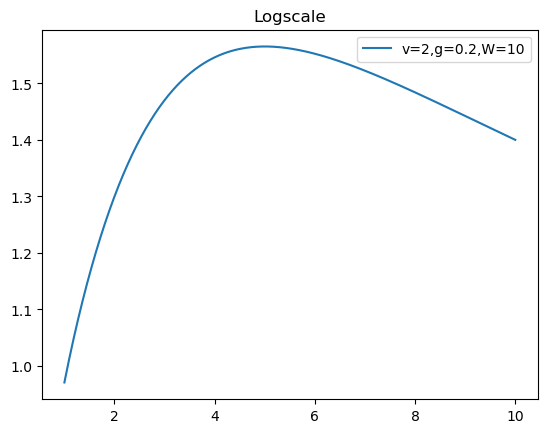

In [19]:
plt.plot(k,coupling(2,0.7,10),label='v=2,g=0.2,W=10')
plt.title('Logscale')
plt.legend()
#plt.xscale('log')
#plt.yscale('log')
#plt.show()





In [20]:
def function(x,t):
    if x.any() > 0:
        return (bose_dist(x)+1)*np.exp(-np.abs(x*t))
    elif x.any() < 0:
        return (bose_dist(x))*np.exp(-np.abs(x*t))

z=np.full(500,10)

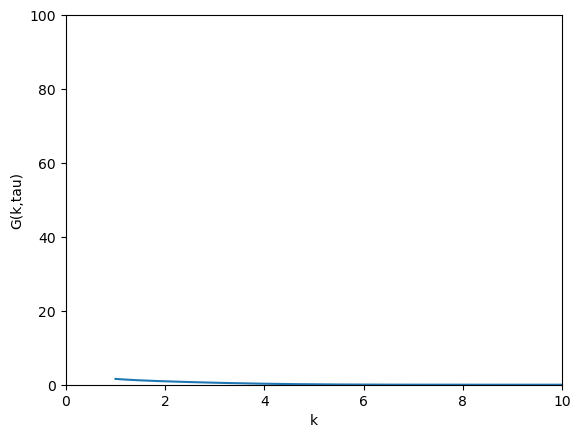

In [21]:
#ax = plt.axes(projection = "3d")
#ax.plot(k,function(k,tau),z)
plt.plot(k,function(k,tau))
plt.xlabel('k')
plt.ylabel('G(k,tau)')

plt.xlim(0,10)
plt.ylim(0,100)

plt.show()

In [22]:
ft=np.fft.fft(function(k,tau))

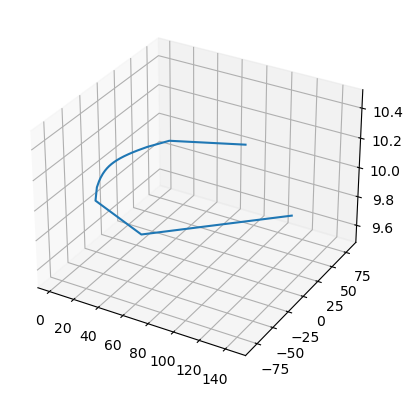

In [23]:
ax = plt.axes(projection = "3d")

ax.plot(np.real(ft),np.imag(ft),10)
plt.show()

In [24]:
help(matplotlib.pyplot.xlabel)

NameError: name 'matplotlib' is not defined

TypeError: 'str' object is not callable

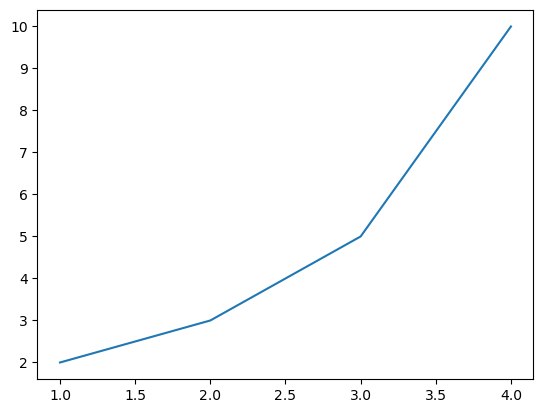

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 3, 5, 10])
plt.xlabel('X-Axis', labelpad=15)
plt.ylabel('Y-Axis', labelpad=20)
plt.show()

In [ ]:
def output(x):
    import numpy as np

    a = x
    b = interact(x)

    df = np.column_stack((a,b))

    np.savetxt('Vdat.dat',df)
    
    return

In [ ]:
output(tau)

In [ ]:
a.index(-0.01002004)

249

In [ ]:
f  = open("test.dat",'w')
f.close()

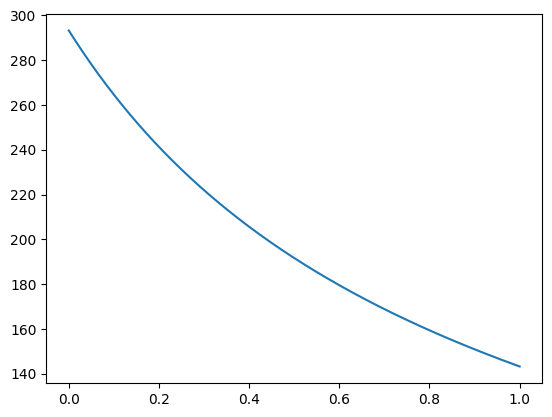

In [ ]:
data = np.loadtxt('Vdat.dat',unpack=True)

plt.plot(data[0],data[1])
plt.show()

In [ ]:
def coupling(v,g,W): 
    w = omega(v)
    cut_off = W
    return g*np.sqrt(w/(1+(w/cut_off)**2))

def omega(v):
    return v*np.abs(k)

In [ ]:
k = np.linspace(1,20,100)
#k = np.linspace(0.1,20,100)

omega(2)

array([ 2.        ,  2.38383838,  2.76767677,  3.15151515,  3.53535354,
        3.91919192,  4.3030303 ,  4.68686869,  5.07070707,  5.45454545,
        5.83838384,  6.22222222,  6.60606061,  6.98989899,  7.37373737,
        7.75757576,  8.14141414,  8.52525253,  8.90909091,  9.29292929,
        9.67676768, 10.06060606, 10.44444444, 10.82828283, 11.21212121,
       11.5959596 , 11.97979798, 12.36363636, 12.74747475, 13.13131313,
       13.51515152, 13.8989899 , 14.28282828, 14.66666667, 15.05050505,
       15.43434343, 15.81818182, 16.2020202 , 16.58585859, 16.96969697,
       17.35353535, 17.73737374, 18.12121212, 18.50505051, 18.88888889,
       19.27272727, 19.65656566, 20.04040404, 20.42424242, 20.80808081,
       21.19191919, 21.57575758, 21.95959596, 22.34343434, 22.72727273,
       23.11111111, 23.49494949, 23.87878788, 24.26262626, 24.64646465,
       25.03030303, 25.41414141, 25.7979798 , 26.18181818, 26.56565657,
       26.94949495, 27.33333333, 27.71717172, 28.1010101 , 28.48

In [ ]:
coupling(2,5,10)

array([ 6.93375245,  7.21573961,  7.48092963,  7.73072108,  7.96627507,
        8.188573  ,  8.39845806,  8.59666549,  8.78384518,  8.96057871,
        9.1273923 ,  9.28476691,  9.43314598,  9.57294159,  9.70453926,
        9.82830172,  9.94457201, 10.05367585, 10.15592355, 10.25161165,
       10.34102407, 10.42443318, 10.50210063, 10.574278  , 10.64120736,
       10.70312177, 10.76024562, 10.81279502, 10.86097807, 10.90499514,
       10.94503907, 10.98129544, 11.01394274, 11.04315261, 11.06908996,
       11.09191322, 11.11177449, 11.12881973, 11.14318894, 11.15501632,
       11.16443047, 11.17155453, 11.17650641, 11.1793989 , 11.18033989,
       11.1794325 , 11.1767753 , 11.1724624 , 11.1665837 , 11.15922497,
       11.15046806, 11.14039105, 11.12906835, 11.11657093, 11.10296636,
       11.08831906, 11.07269035, 11.05613861, 11.03871942, 11.02048566,
       11.00148763, 10.98177318, 10.96138782, 10.94037481, 10.91877526,
       10.89662825, 10.87397091, 10.85083849, 10.82726451, 10.80

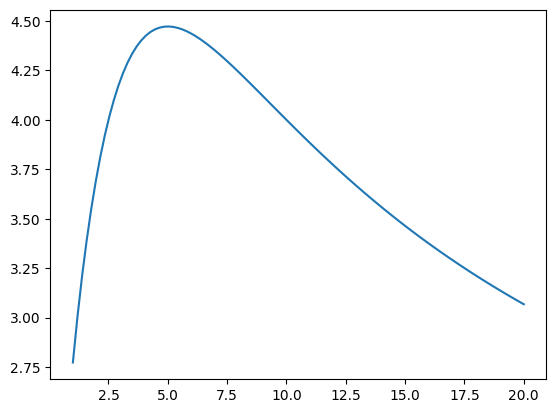

In [ ]:
plt.plot(k,coupling(2,2,10))

In [ ]:
a = np.log(coupling(2,0.2,10))
b = np.log(omega(2))

c = []
d = []

j = 0

for i in a:
    j += 1
    if j%20 == 0:
        c.append(i)

j = 0

for i in b:
    j += 1
    if j%20 == 0:
        d.append(i)

a = np.log(omega(2))
b = np.log(coupling(2,0.2,10))

df = np.column_stack((a,b))

np.savetxt('Test.dat',df)
